In [4]:
import os
import cv2
from shapely.geometry import Polygon

from src import utils
import src
from src.data.annotations.coco_annotations_manager import \
    CocoAnnotationsManager
from src.visualization.image_visualizer import show_image
from src.data.augmentation.template_manager import ImagesTemplatesManager


ANNOTATIONS_PATH = os.path.join(utils.DATA_PATH, 'annotations', 'annotations.json')
TEMPLATES_CONFIG_PATH = os.path.join(utils.DATA_PATH, 'annotations', 'templates.json')

CARD_IMAGES_PATH = os.path.join(utils.DATA_PATH, 'raw', 'templates')
IMAGE_NAME = '1.jpeg'

annotations_manager = CocoAnnotationsManager(ANNOTATIONS_PATH)
image_templates_manager = ImagesTemplatesManager(
    templates_config_path=TEMPLATES_CONFIG_PATH,
    annotation_manager=annotations_manager,
)

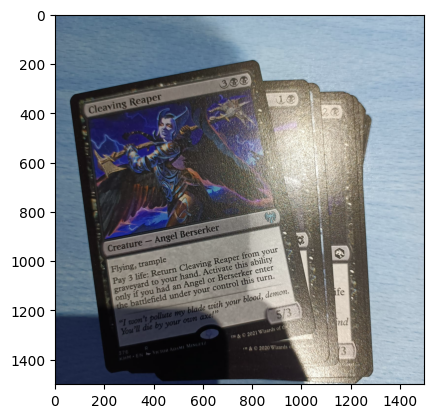

In [5]:
template = image_templates_manager.get_template_by_image_id(0)
show_image(template.image)

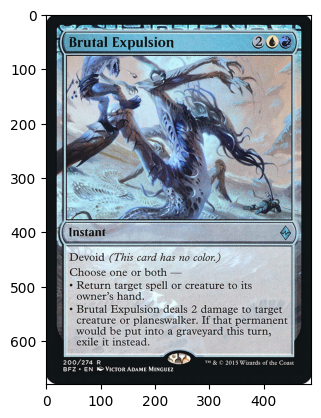

In [6]:
patch = cv2.imread(os.path.join(utils.DATA_PATH, 'raw', 'card_images', '10010_normal.jpg'))
show_image(patch)

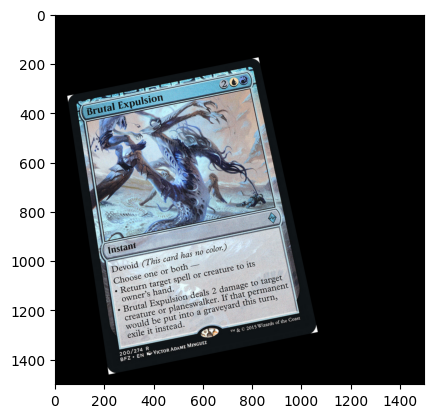

In [7]:
import numpy as np

source_points = np.float32([
    [0,0],
    [0, patch.shape[0]-1],
    [patch.shape[1]-1, 0],
    [patch.shape[1]-1, patch.shape[0]-1]
])

dst_points = np.float32(list(template.segmentation.exterior.coords))

dst_points = np.float32(
    [
        [50.0, 332.0],
        [218.0, 1460.0],
        [824.0, 176.0],
        [1064.0, 1288.0000000000005],
    ]
)

# https://www.programcreek.com/python/example/85017/cv2.getPerspectiveTransform
# Compute the perspective transform M
M = cv2.getPerspectiveTransform(source_points, dst_points)
trans_img = cv2.warpPerspective(patch, M, (template.image.shape[0], template.image.shape[1]))
show_image(trans_img)


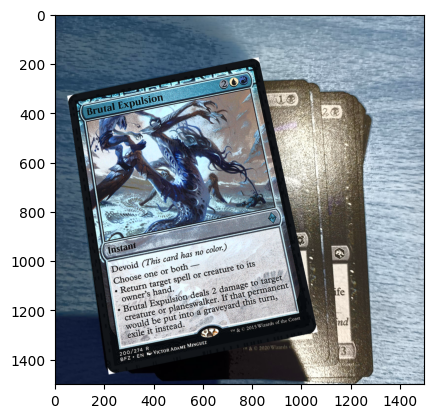

In [8]:
new_image = template.image.copy()

def int_coords(coords):
    return np.array(coords).round().astype(np.int32)

exterior = [int_coords(template.segmentation.exterior.coords)]

cv2.fillPoly(new_image, exterior, color=(0,0,0))

final_image = cv2.add(new_image, trans_img)
final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2YUV)
final_image[:,:,0] = cv2.equalizeHist(final_image[:,:,0])
final_image = cv2.cvtColor(final_image, cv2.COLOR_YUV2BGR)
show_image(final_image)


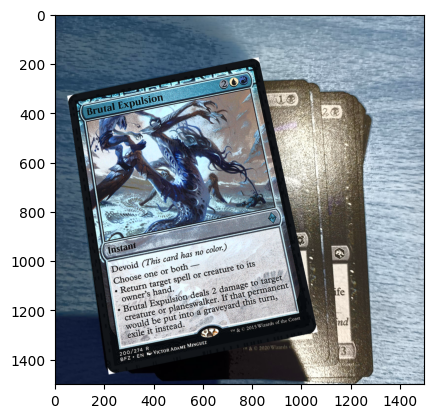

In [9]:
show_image(final_image)

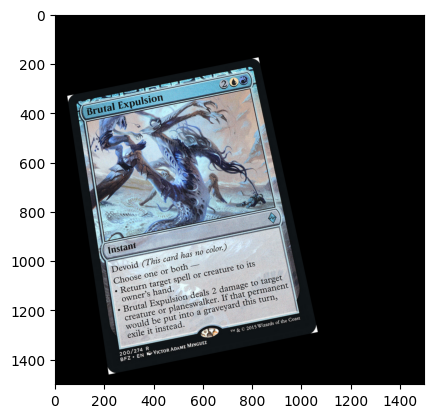

In [10]:
image, segmentation = template.generate_image(patch)
show_image(image)